# Red Neuronal Multicapa Optimizada

## Cargar los datos

In [ ]:
import numpy as np
import struct

def load_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows * cols)
    return images

def load_labels(filename):
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

train_images = load_images('/content/drive/MyDrive/Colab Notebooks/IC/train-images.idx3-ubyte')
train_labels = load_labels('/content/drive/MyDrive/Colab Notebooks/IC/train-labels.idx1-ubyte')

test_images = load_images('/content/drive/MyDrive/Colab Notebooks/IC/t10k-images.idx3-ubyte')
test_labels = load_labels('/content/drive/MyDrive/Colab Notebooks/IC/t10k-labels.idx1-ubyte')

train_images = train_images / 255.0
test_images = test_images / 255.0

## Inicializar los Pámetros

In [ ]:
import numpy as np

def initialize_parameters_mlp(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))

    return W1, b1, W2, b2


## Funciones de activación

In [ ]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def sigmoid_derivative(Z):
    return Z * (1 - Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return expZ / expZ.sum(axis=1, keepdims=True)

## Propagación hacia Delante

In [ ]:
def forward_propagation_mlp(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

## Función de Perdida (Entropía Cruzada)

In [ ]:
def compute_loss_mlp(A2, Y):
    m = Y.shape[0]
    log_probs = -np.log(A2[range(m), Y])
    loss = np.sum(log_probs) / m
    return loss

## Propagación hacia Atras

In [ ]:
def backward_propagation_mlp(X, Y, Z1, A1, A2, W2):
    m = X.shape[0]

    dZ2 = A2
    dZ2[range(m), Y] -= 1
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2

## Actualizar Parámetros

In [ ]:
def update_parameters_mlp(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

## Entrenamiento del Modelo

In [ ]:
def train_neural_network_mlp(X, Y, hidden_size, output_size, epochs, learning_rate):
    input_size = X.shape[1]
    W1, b1, W2, b2 = initialize_parameters_mlp(input_size, hidden_size, output_size)

    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation_mlp(X, W1, b1, W2, b2)
        loss = compute_loss_mlp(A2, Y)
        dW1, db1, dW2, db2 = backward_propagation_mlp(X, Y, Z1, A1, A2, W2)
        W1, b1, W2, b2 = update_parameters_mlp(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if i % 10 == 0:
            print(f'Epoch {i}, Pérdida: {loss:.4f}')

    return W1, b1, W2, b2

## Entrenar Red Neuronal Multicapa

In [ ]:
hidden_size = 256
output_size = 10
epochs = 200
learning_rate = 0.1

W1, b1, W2, b2 = train_neural_network_mlp(train_images, train_labels, hidden_size, output_size, epochs, learning_rate)

Epoch 0, Pérdida: 2.3063
Epoch 10, Pérdida: 2.2976
Epoch 20, Pérdida: 2.2937
Epoch 30, Pérdida: 2.2895
Epoch 40, Pérdida: 2.2846
Epoch 50, Pérdida: 2.2789
Epoch 60, Pérdida: 2.2721
Epoch 70, Pérdida: 2.2637
Epoch 80, Pérdida: 2.2535
Epoch 90, Pérdida: 2.2408
Epoch 100, Pérdida: 2.2252
Epoch 110, Pérdida: 2.2060
Epoch 120, Pérdida: 2.1825
Epoch 130, Pérdida: 2.1542
Epoch 140, Pérdida: 2.1205
Epoch 150, Pérdida: 2.0810
Epoch 160, Pérdida: 2.0356
Epoch 170, Pérdida: 1.9845
Epoch 180, Pérdida: 1.9284
Epoch 190, Pérdida: 1.8682


## Evaluar el modelo

In [ ]:
def predict_mlp(X, W1, b1, W2, b2):
    _, A1, _, A2 = forward_propagation_mlp(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=1)

test_predictions = predict_mlp(test_images, W1, b1, W2, b2)
test_accuracy = np.mean(test_predictions == test_labels)

train_predictions = predict_mlp(train_images, W1, b1, W2, b2)
train_accuracy = np.mean(train_predictions == train_labels)

print(f'Precisión en el conjunto de entrenamiento: {train_accuracy * 100:.2f}%')
print(f'Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%')


Precisión en el conjunto de entrenamiento: 95.20%
Precisión en el conjunto de prueba: 94.93%


## Predicciones y Detección de Errores

Total de errores: 536
Imagen 260: Dígito predicho: 0, Dígito real: 6
Imagen 301: Dígito predicho: 6, Dígito real: 4
Imagen 321: Dígito predicho: 7, Dígito real: 9
Imagen 322: Dígito predicho: 7, Dígito real: 2
Imagen 341: Dígito predicho: 3, Dígito real: 5
Imagen 353: Dígito predicho: 0, Dígito real: 5
Imagen 359: Dígito predicho: 9, Dígito real: 7
Imagen 360: Dígito predicho: 4, Dígito real: 9
Imagen 363: Dígito predicho: 7, Dígito real: 2
Imagen 382: Dígito predicho: 7, Dígito real: 3
Imagen 413: Dígito predicho: 3, Dígito real: 5
Imagen 446: Dígito predicho: 0, Dígito real: 6
Imagen 449: Dígito predicho: 8, Dígito real: 9
Imagen 450: Dígito predicho: 5, Dígito real: 3
Imagen 479: Dígito predicho: 8, Dígito real: 5
Imagen 480: Dígito predicho: 3, Dígito real: 9
Imagen 496: Dígito predicho: 2, Dígito real: 8
Imagen 503: Dígito predicho: 3, Dígito real: 5
Imagen 508: Dígito predicho: 5, Dígito real: 3
Imagen 512: Dígito predicho: 1, Dígito real: 4
Imagen 532: Dígito predicho: 6, Dígito

ValueError: num must be an integer with 1 <= num <= 10, not 11

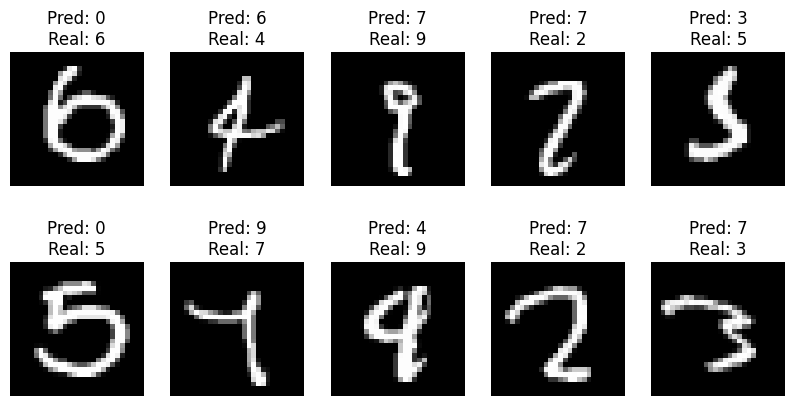

In [ ]:
def predict_mlp(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation_mlp(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=1)

predictions = predict_mlp(test_images, W1, b1, W2, b2)

incorrect_indices = np.where(predictions != test_labels)[0]

print(f"Total de errores: {len(incorrect_indices)}")

for i in incorrect_indices[10:]:
    print(f'Imagen {i + 1}: Dígito predicho: {predictions[i]}, Dígito real: {test_labels[i]}')

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for index, i in enumerate(incorrect_indices[10:]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {predictions[i]}\nReal: {test_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


## Guardar Parámetros de la Red


In [ ]:
import numpy as np

np.save('/content/drive/MyDrive/Colab Notebooks/IC/Red Neuronal Multicapa/W1_mlp_11000.npy', W1)  # Pesos de la primera capa (capa oculta)
np.save('/content/drive/MyDrive/Colab Notebooks/IC/Red Neuronal Multicapa/b1_mlp_11000.npy', b1)  # Sesgo de la primera capa
np.save('/content/drive/MyDrive/Colab Notebooks/IC/Red Neuronal Multicapa/W2_mlp_11000.npy', W2)  # Pesos de la segunda capa (capa de salida)
np.save('/content/drive/MyDrive/Colab Notebooks/IC/Red Neuronal Multicapa/b2_mlp_11000.npy', b2)  # Sesgo de la segunda capa


## Cargar los parámetros guardados

In [ ]:
import numpy as np
import struct

W1 = np.load('/content/drive/MyDrive/Colab Notebooks/IC/Red Neuronal Multicapa/W1_mlp_11000.npy')
b1 = np.load('/content/drive/MyDrive/Colab Notebooks/IC/Red Neuronal Multicapa/b1_mlp_11000.npy')
W2 = np.load('/content/drive/MyDrive/Colab Notebooks/IC/Red Neuronal Multicapa/W2_mlp_11000.npy')
b2 = np.load('/content/drive/MyDrive/Colab Notebooks/IC/Red Neuronal Multicapa/b2_mlp_11000.npy')


## Continuar Entrenando el Modelo

In [ ]:
def continue_training_neural_network_mlp(X, Y, W1, b1, W2, b2, epochs, learning_rate):
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation_mlp(X, W1, b1, W2, b2)
        loss = compute_loss_mlp(A2, Y)
        dW1, db1, dW2, db2 = backward_propagation_mlp(X, Y, Z1, A1, A2, W2)
        W1, b1, W2, b2 = update_parameters_mlp(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if i % 10 == 0:
            print(f'Epoch {i}, Pérdida: {loss:.4f}')

    return W1, b1, W2, b2


## Continuar el Entrenamiento

In [ ]:
additional_epochs = 800
learning_rate = 0.1

W1, b1, W2, b2 = continue_training_neural_network_mlp(train_images, train_labels, W1, b1, W2, b2, additional_epochs, learning_rate)

Epoch 0, Pérdida: 0.1692
Epoch 10, Pérdida: 0.1691
Epoch 20, Pérdida: 0.1690
Epoch 30, Pérdida: 0.1689
Epoch 40, Pérdida: 0.1688
Epoch 50, Pérdida: 0.1687
Epoch 60, Pérdida: 0.1687
Epoch 70, Pérdida: 0.1686
Epoch 80, Pérdida: 0.1685
Epoch 90, Pérdida: 0.1684
Epoch 100, Pérdida: 0.1683
Epoch 110, Pérdida: 0.1682
Epoch 120, Pérdida: 0.1682
Epoch 130, Pérdida: 0.1681
Epoch 140, Pérdida: 0.1680
Epoch 150, Pérdida: 0.1679
Epoch 160, Pérdida: 0.1678
Epoch 170, Pérdida: 0.1678
Epoch 180, Pérdida: 0.1677
Epoch 190, Pérdida: 0.1676
Epoch 200, Pérdida: 0.1675
Epoch 210, Pérdida: 0.1674
Epoch 220, Pérdida: 0.1674
Epoch 230, Pérdida: 0.1673
Epoch 240, Pérdida: 0.1672
Epoch 250, Pérdida: 0.1671
Epoch 260, Pérdida: 0.1670
Epoch 270, Pérdida: 0.1669
Epoch 280, Pérdida: 0.1669
Epoch 290, Pérdida: 0.1668
Epoch 300, Pérdida: 0.1667
Epoch 310, Pérdida: 0.1666
Epoch 320, Pérdida: 0.1665
Epoch 330, Pérdida: 0.1665
Epoch 340, Pérdida: 0.1664
Epoch 350, Pérdida: 0.1663
Epoch 360, Pérdida: 0.1662
Epoch 370, P

# Red Neuronal Multicapa Optimizada

Época 1/100 - Pérdida promedio: 0.5617 - Precisión (Train): 91.17% - Precisión (Test): 91.54%
Época 2/100 - Pérdida promedio: 0.2741 - Precisión (Train): 93.27% - Precisión (Test): 93.37%
Época 3/100 - Pérdida promedio: 0.2216 - Precisión (Train): 94.33% - Precisión (Test): 94.44%
Época 4/100 - Pérdida promedio: 0.1881 - Precisión (Train): 95.31% - Precisión (Test): 95.11%
Época 5/100 - Pérdida promedio: 0.1635 - Precisión (Train): 95.86% - Precisión (Test): 95.64%
Época 6/100 - Pérdida promedio: 0.1442 - Precisión (Train): 96.37% - Precisión (Test): 95.93%
Época 7/100 - Pérdida promedio: 0.1288 - Precisión (Train): 96.62% - Precisión (Test): 96.30%
Época 8/100 - Pérdida promedio: 0.1166 - Precisión (Train): 97.00% - Precisión (Test): 96.31%
Época 9/100 - Pérdida promedio: 0.1061 - Precisión (Train): 97.30% - Precisión (Test): 96.51%
Época 10/100 - Pérdida promedio: 0.0965 - Precisión (Train): 97.48% - Precisión (Test): 96.76%
Época 11/100 - Pérdida promedio: 0.0890 - Precisión (Train)

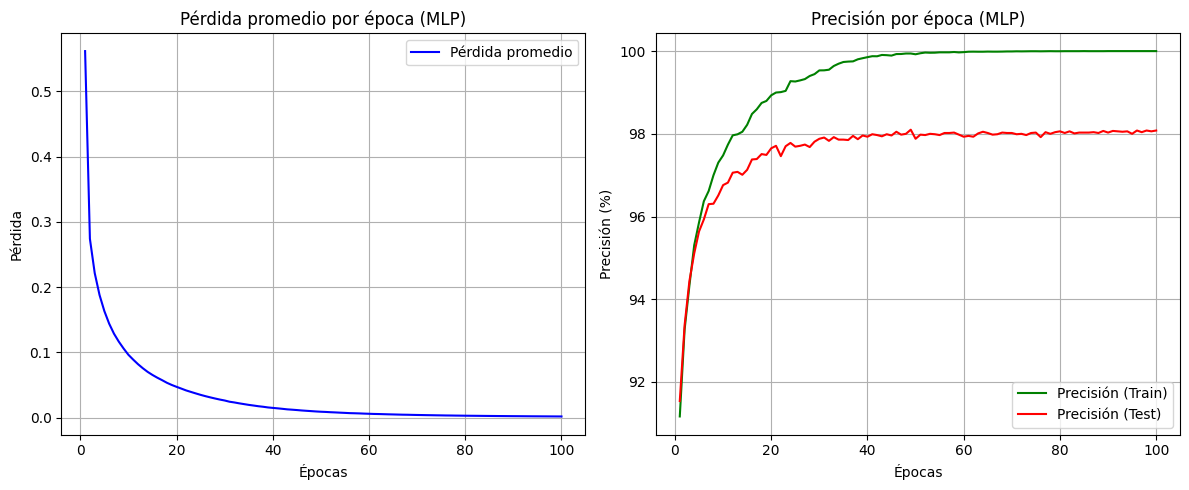

In [ ]:
import numpy as np
import struct
import matplotlib.pyplot as plt

# Funciones para cargar imágenes y etiquetas
def load_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows, cols)
    return images

def load_labels(filename):
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Cargar y preprocesar datos
train_images = load_images('/content/drive/MyDrive/Colab Notebooks/IC/train-images.idx3-ubyte')
train_labels = load_labels('/content/drive/MyDrive/Colab Notebooks/IC/train-labels.idx1-ubyte')
test_images = load_images('/content/drive/MyDrive/Colab Notebooks/IC/t10k-images.idx3-ubyte')
test_labels = load_labels('/content/drive/MyDrive/Colab Notebooks/IC/t10k-labels.idx1-ubyte')

# Normalizar y aplanar imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape((-1, 28 * 28))
test_images = test_images.reshape((-1, 28 * 28))

# Funciones de activación
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Inicialización de pesos y sesgos
def initialize_weights(layer_sizes):
    weights = []
    biases = []

    for i in range(len(layer_sizes) - 1):
        weight = np.random.randn(layer_sizes[i + 1], layer_sizes[i]) * np.sqrt(2. / layer_sizes[i])
        bias = np.zeros(layer_sizes[i + 1])
        weights.append(weight)
        biases.append(bias)

    return weights, biases

# Propagación hacia adelante
def forward_propagation(X, weights, biases):
    activations = [X]
    zs = []

    for w, b in zip(weights, biases):
        z = np.dot(activations[-1], w.T) + b
        zs.append(z)
        activation = relu(z) if len(zs) < len(weights) else softmax(z)
        activations.append(activation)

    return activations, zs

# Retropropagación
def backpropagation(activations, zs, y, weights, biases):
    gradients_w = [np.zeros_like(w) for w in weights]
    gradients_b = [np.zeros_like(b) for b in biases]

    # Inicializar error en la última capa
    m = y.shape[0]
    d_output = activations[-1].copy()
    d_output[np.arange(m), y] -= 1
    d_output /= m

    delta = d_output

    for i in reversed(range(len(weights))):
        gradients_w[i] = np.dot(delta.T, activations[i])
        gradients_b[i] = np.sum(delta, axis=0)

        if i > 0:  # Calcular delta para capas anteriores
            delta = np.dot(delta, weights[i]) * relu_derivative(zs[i - 1])

    return gradients_w, gradients_b


# Actualización de pesos y sesgos
def update_weights(weights, biases, gradients_w, gradients_b, learning_rate):
    for i in range(len(weights)):
        weights[i] -= learning_rate * gradients_w[i]
        biases[i] -= learning_rate * gradients_b[i]

# Entrenamiento del modelo MLP
def train_mlp(train_images, train_labels, test_images, test_labels, layer_sizes, epochs, batch_size, learning_rate):
    weights, biases = initialize_weights(layer_sizes)
    train_losses = []
    train_accuracies = []
    test_accuracies = []

    num_samples = train_images.shape[0]

    for epoch in range(epochs):
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        total_loss = 0

        for start_idx in range(0, num_samples, batch_size):
            end_idx = min(start_idx + batch_size, num_samples)
            batch_indices = indices[start_idx:end_idx]
            batch_images = train_images[batch_indices]
            batch_labels = train_labels[batch_indices]

            # Forward y Backpropagation
            activations, zs = forward_propagation(batch_images, weights, biases)
            batch_loss = -np.log(activations[-1][np.arange(len(batch_labels)), batch_labels]).mean()
            total_loss += batch_loss
            gradients_w, gradients_b = backpropagation(activations, zs, batch_labels, weights, biases)
            update_weights(weights, biases, gradients_w, gradients_b, learning_rate)


        avg_loss = total_loss / (num_samples // batch_size)
        train_losses.append(avg_loss)

        # Calcular precisión
        train_accuracy = evaluate_model(train_images, train_labels, weights, biases)
        test_accuracy = evaluate_model(test_images, test_labels, weights, biases)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        print(f"Época {epoch + 1}/{epochs} - Pérdida promedio: {avg_loss:.4f} - "
              f"Precisión (Train): {train_accuracy * 100:.2f}% - "
              f"Precisión (Test): {test_accuracy * 100:.2f}%")

    return train_losses, train_accuracies, test_accuracies

# Evaluación del modelo
def evaluate_model(images, labels, weights, biases):
    activations, _ = forward_propagation(images, weights, biases)
    predictions = np.argmax(activations[-1], axis=1)
    accuracy = np.mean(predictions == labels)
    return accuracy

# Parámetros del modelo
layer_sizes = [784, 254, 128, 10]
epochs = 100
batch_size = 32
learning_rate = 0.01

# Entrenar el modelo
train_losses, train_accuracies, test_accuracies = train_mlp(
    train_images, train_labels, test_images, test_labels, layer_sizes, epochs, batch_size, learning_rate
)

# Graficar la pérdida y la precisión
plt.figure(figsize=(12, 5))

# Pérdida promedio
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label="Pérdida promedio", color="blue")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Pérdida promedio por época (MLP)")
plt.grid()
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), [acc * 100 for acc in train_accuracies], label="Precisión (Train)", color="green")
plt.plot(range(1, epochs + 1), [acc * 100 for acc in test_accuracies], label="Precisión (Test)", color="red")
plt.xlabel("Épocas")
plt.ylabel("Precisión (%)")
plt.title("Precisión por época (MLP)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
